<a href="https://colab.research.google.com/github/gaurav21s/deep-learning-basic/blob/main/Cnn_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fm = keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)= fm.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
 X_train_full=X_train_full.reshape((60000,28,28,1))
 X_test=X_test.reshape((10000,28,28,1))

In [5]:
X_train_n=X_train_full/255
X_test_n=X_test/255

In [6]:
X_valid,X_train=X_train_n[:6000],X_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
X_test=X_test_n

In [7]:
np.random.seed(42)
tf.random.set_seed(42)


In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               1081800   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,103,230
Trainable params: 1,103,230
Non-trainable params: 0
______________________________________________

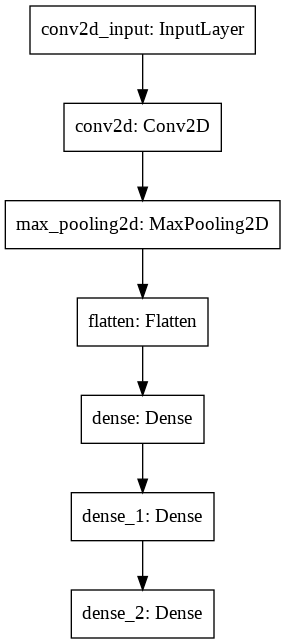

In [10]:
import pydot
keras.utils.plot_model(model)


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train,epochs=20,batch_size=64,
                  validation_data=(X_valid,y_valid))

Epoch 1/20
844/844 [==============================] - 31s 37ms/step - loss: 0.1361 - accuracy: 0.9597 - val_loss: 0.1190 - val_accuracy: 0.9652
Epoch 2/20
844/844 [==============================] - 30s 35ms/step - loss: 0.1204 - accuracy: 0.9647 - val_loss: 0.1157 - val_accuracy: 0.9650
Epoch 3/20
844/844 [==============================] - 30s 35ms/step - loss: 0.1077 - accuracy: 0.9677 - val_loss: 0.1011 - val_accuracy: 0.9692
Epoch 4/20
844/844 [==============================] - 30s 35ms/step - loss: 0.0979 - accuracy: 0.9705 - val_loss: 0.0938 - val_accuracy: 0.9725
Epoch 5/20
844/844 [==============================] - 30s 36ms/step - loss: 0.0894 - accuracy: 0.9732 - val_loss: 0.0924 - val_accuracy: 0.9725
Epoch 6/20
844/844 [==============================] - 31s 36ms/step - loss: 0.0822 - accuracy: 0.9752 - val_loss: 0.0895 - val_accuracy: 0.9737
Epoch 7/20
844/844 [==============================] - 31s 37ms/step - loss: 0.0763 - accuracy: 0.9774 - val_loss: 0.0821 - val_accuracy:

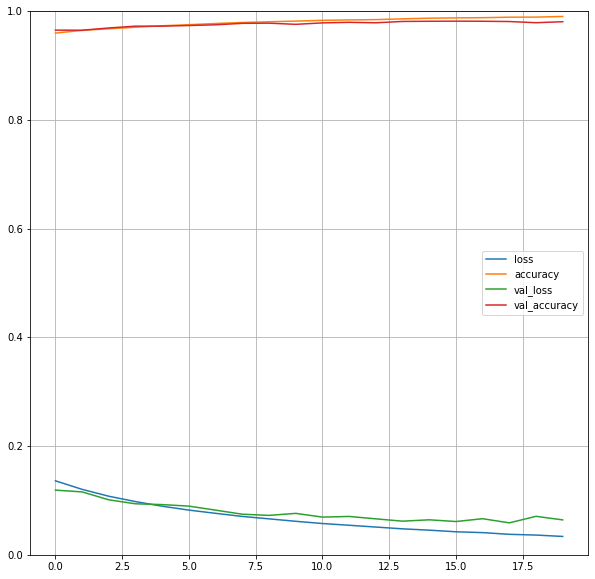

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0641 - accuracy: 0.9784


[0.06406111270189285, 0.9783999919891357]

In [16]:
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model_b.add(keras.layers.MaxPooling2D((2,2)))

model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(200,activation="relu"))
model_b.add(keras.layers.Dense(100,activation="relu"))
model_b.add(keras.layers.Dense(10,activation="softmax"))

In [21]:
model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

In [22]:
history_b=model_b.fit(X_train,y_train,epochs=20,batch_size=64,
                  validation_data=(X_valid,y_valid))

Epoch 1/20
844/844 [==============================] - 91s 108ms/step - loss: 0.6777 - accuracy: 0.8328 - val_loss: 0.2801 - val_accuracy: 0.9205
Epoch 2/20
844/844 [==============================] - 50s 60ms/step - loss: 0.2669 - accuracy: 0.9209 - val_loss: 0.2197 - val_accuracy: 0.9375
Epoch 3/20
844/844 [==============================] - 51s 60ms/step - loss: 0.2106 - accuracy: 0.9365 - val_loss: 0.1787 - val_accuracy: 0.9503
Epoch 4/20
844/844 [==============================] - 51s 60ms/step - loss: 0.1750 - accuracy: 0.9478 - val_loss: 0.1497 - val_accuracy: 0.9577
Epoch 5/20
844/844 [==============================] - 50s 60ms/step - loss: 0.1493 - accuracy: 0.9554 - val_loss: 0.1351 - val_accuracy: 0.9608
Epoch 6/20
844/844 [==============================] - 51s 60ms/step - loss: 0.1302 - accuracy: 0.9608 - val_loss: 0.1194 - val_accuracy: 0.9660
Epoch 7/20
844/844 [==============================] - 51s 61ms/step - loss: 0.1155 - accuracy: 0.9654 - val_loss: 0.1086 - val_accuracy

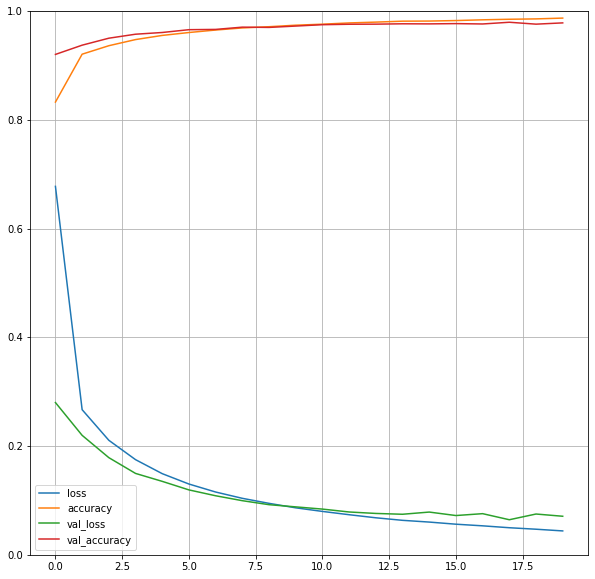

In [23]:
import pandas as pd

pd.DataFrame(history_b.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
model_b.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0668 - accuracy: 0.9776


[0.06684912741184235, 0.9775999784469604]